1.Import the libraries:

In [10]:
import numpy as np
import pandas as pd
#ImageDataGenerator -> Use for the expansion of the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

2. Define image properties:

#1 TO equalize the size of all the datapoints

In [11]:
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

3. Prepare dataset for training model:

In [12]:
filenames=os.listdir("C:/Users/asus/Downloads/dogs_vs_cats/train")
#train=['cat.0.jpg','cat.1.jpg',',....,'dog.19.jpg']

categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)
        
#Dog level -> 1
#Cat -0++

df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

In [13]:
filenames=os.listdir("C:/Users/asus/Downloads/dogs_vs_cats/test")
#train=['cat.0.jpg','cat.1.jpg',',....,'dog.19.jpg']

categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)
        
#Dog level -> 1
#Cat -0++

newdf=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

In [14]:
#newdf

4. Create the Convolutional neural network model:

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization


model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
#how many filters do you use in first convolutional layer->32,
model.add(BatchNormalization())  
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Dropout(0.25))  # rate parameter is used to deternines the chance of dropping out neurons

model.add(Conv2D(64,(3,3),activation='relu')) #how many filters do you use in first convolutional layer->64, 
model.add(BatchNormalization()) #Filter_size=3x3
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu')) #how many filters do you use in first convolutional layer->128
model.add(BatchNormalization())  #Filter_size=3x3
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
#1st Hidden layer
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
#2nd Hidden layer
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy', #Computes the crossentropy loss between the  true labels and predict label.
  optimizer='rmsprop',metrics=['accuracy'])

C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5. Analyzing model:

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,942,786 (49.37 MB)

 Trainable params: 12,941,314 (49.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

6. Define callbacks and learning rate:

In [17]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau  
#Stop training when a monitored metric(accuracy) has stopped improving.
earlystop = EarlyStopping(patience = 10) 
#if each 10 epochs accuracy is not improving then stop the training
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,
                                            min_lr = 0.00001)
#Reduce learning rate when a metric has stopped improving.
callbacks = [earlystop,learning_rate_reduction]

7. Manage data:

In [18]:
df["category"] = df["category"].replace({0:'cat',1:'dog'})
train_df,validate_df = train_test_split(df,test_size=0.20,random_state=42)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

total_train=train_df.shape[0]
total_validate=validate_df.shape[0]


In [19]:
newdf["category"] = newdf["category"].replace({0:'cat',1:'dog'})
test_df=newdf.reset_index(drop=True)
total_test=test_df.shape[0]

8. Training and validation data generator:

In [20]:
batch_size=15
train_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )

train_generator = train_datagen.flow_from_dataframe(train_df,
                                                 "C:/Users/asus/Downloads/dogs_vs_cats/train/",x_col='filename',y_col='category',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "C:/Users/asus/Downloads/dogs_vs_cats/train/", 
    x_col='filename',
    y_col='category',
    target_size=Image_Size,
    class_mode='categorical',
    batch_size=batch_size
)

test_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)

test_generator = train_datagen.flow_from_dataframe(test_df,
                                                 "C:/Users/asus/Downloads/dogs_vs_cats/test/",x_col='filename',y_col='category',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)

Found 16000 validated image filenames belonging to 2 classes.
Found 4000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


9. Model Training:

In [21]:
epochs=10
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 541s 504ms/step - accuracy: 0.5798 - loss: 0.9807 - val_accuracy: 0.6398 - val_loss: 0.6713 - learning_rate: 0.0010
Epoch 2/10


C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\keras\src\callbacks\callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


   1/1066 ━━━━━━━━━━━━━━━━━━━━ 7:25 418ms/step - accuracy: 0.8000 - loss: 0.4493

C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1066/1066 ━━━━━━━━━━━━━━━━━━━━ 26s 24ms/step - accuracy: 0.8000 - loss: 0.4493 - val_accuracy: 0.5997 - val_loss: 0.8581 - learning_rate: 0.0010
Epoch 3/10
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 521s 488ms/step - accuracy: 0.6855 - loss: 0.6033 - val_accuracy: 0.7419 - val_loss: 0.5274 - learning_rate: 0.0010
Epoch 4/10
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 0.4000 - loss: 0.8468 - val_accuracy: 0.7165 - val_loss: 0.5683 - learning_rate: 0.0010
Epoch 5/10
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 518s 486ms/step - accuracy: 0.7277 - loss: 0.5479 - val_accuracy: 0.7188 - val_loss: 0.5467 - learning_rate: 0.0010
Epoch 6/10
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 23s 21ms/step - accuracy: 0.9333 - loss: 0.3268 - val_accuracy: 0.7100 - val_loss: 0.5695 - learning_rate: 0.0010
Epoch 7/10
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 556s 522ms/step - accuracy: 0.7495 - loss: 0.5182 - val_accuracy: 0.8068 - val_loss: 0.4479 - learning_rate: 0.0010
Epoch 8/10
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 23s 21ms/step - accuracy: 0

10. Save the model:

In [22]:
model.save("model1_catsVSdogs_10epoch.h5")

In [23]:
# from tensorflow.keras.models import load_model

In [24]:
# model = load_model("model1_catsVSdogs_10epoch.h5")

11. Test data preparation:

In [25]:
test_filenames = os.listdir("C:/Users/asus/Downloads/dogs_vs_cats/test/")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

12. Make categorical prediction:

In [26]:
predict = model.predict(test_generator, steps=int(np.ceil(nb_samples / batch_size)))

334/334 ━━━━━━━━━━━━━━━━━━━━ 67s 198ms/step


In [34]:

unpickle_model = pickle.loads(pickle_cnn_model)

print(unpickle_model)  


<Sequential name=sequential, built=True>


13. Convert labels to categories:

In [37]:
test_df['category'] = np.argmax(predict, axis=-1)

label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

C:\Users\asus\AppData\Local\Temp\ipykernel_7824\3639850117.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })


14.Visualize the prediction results:

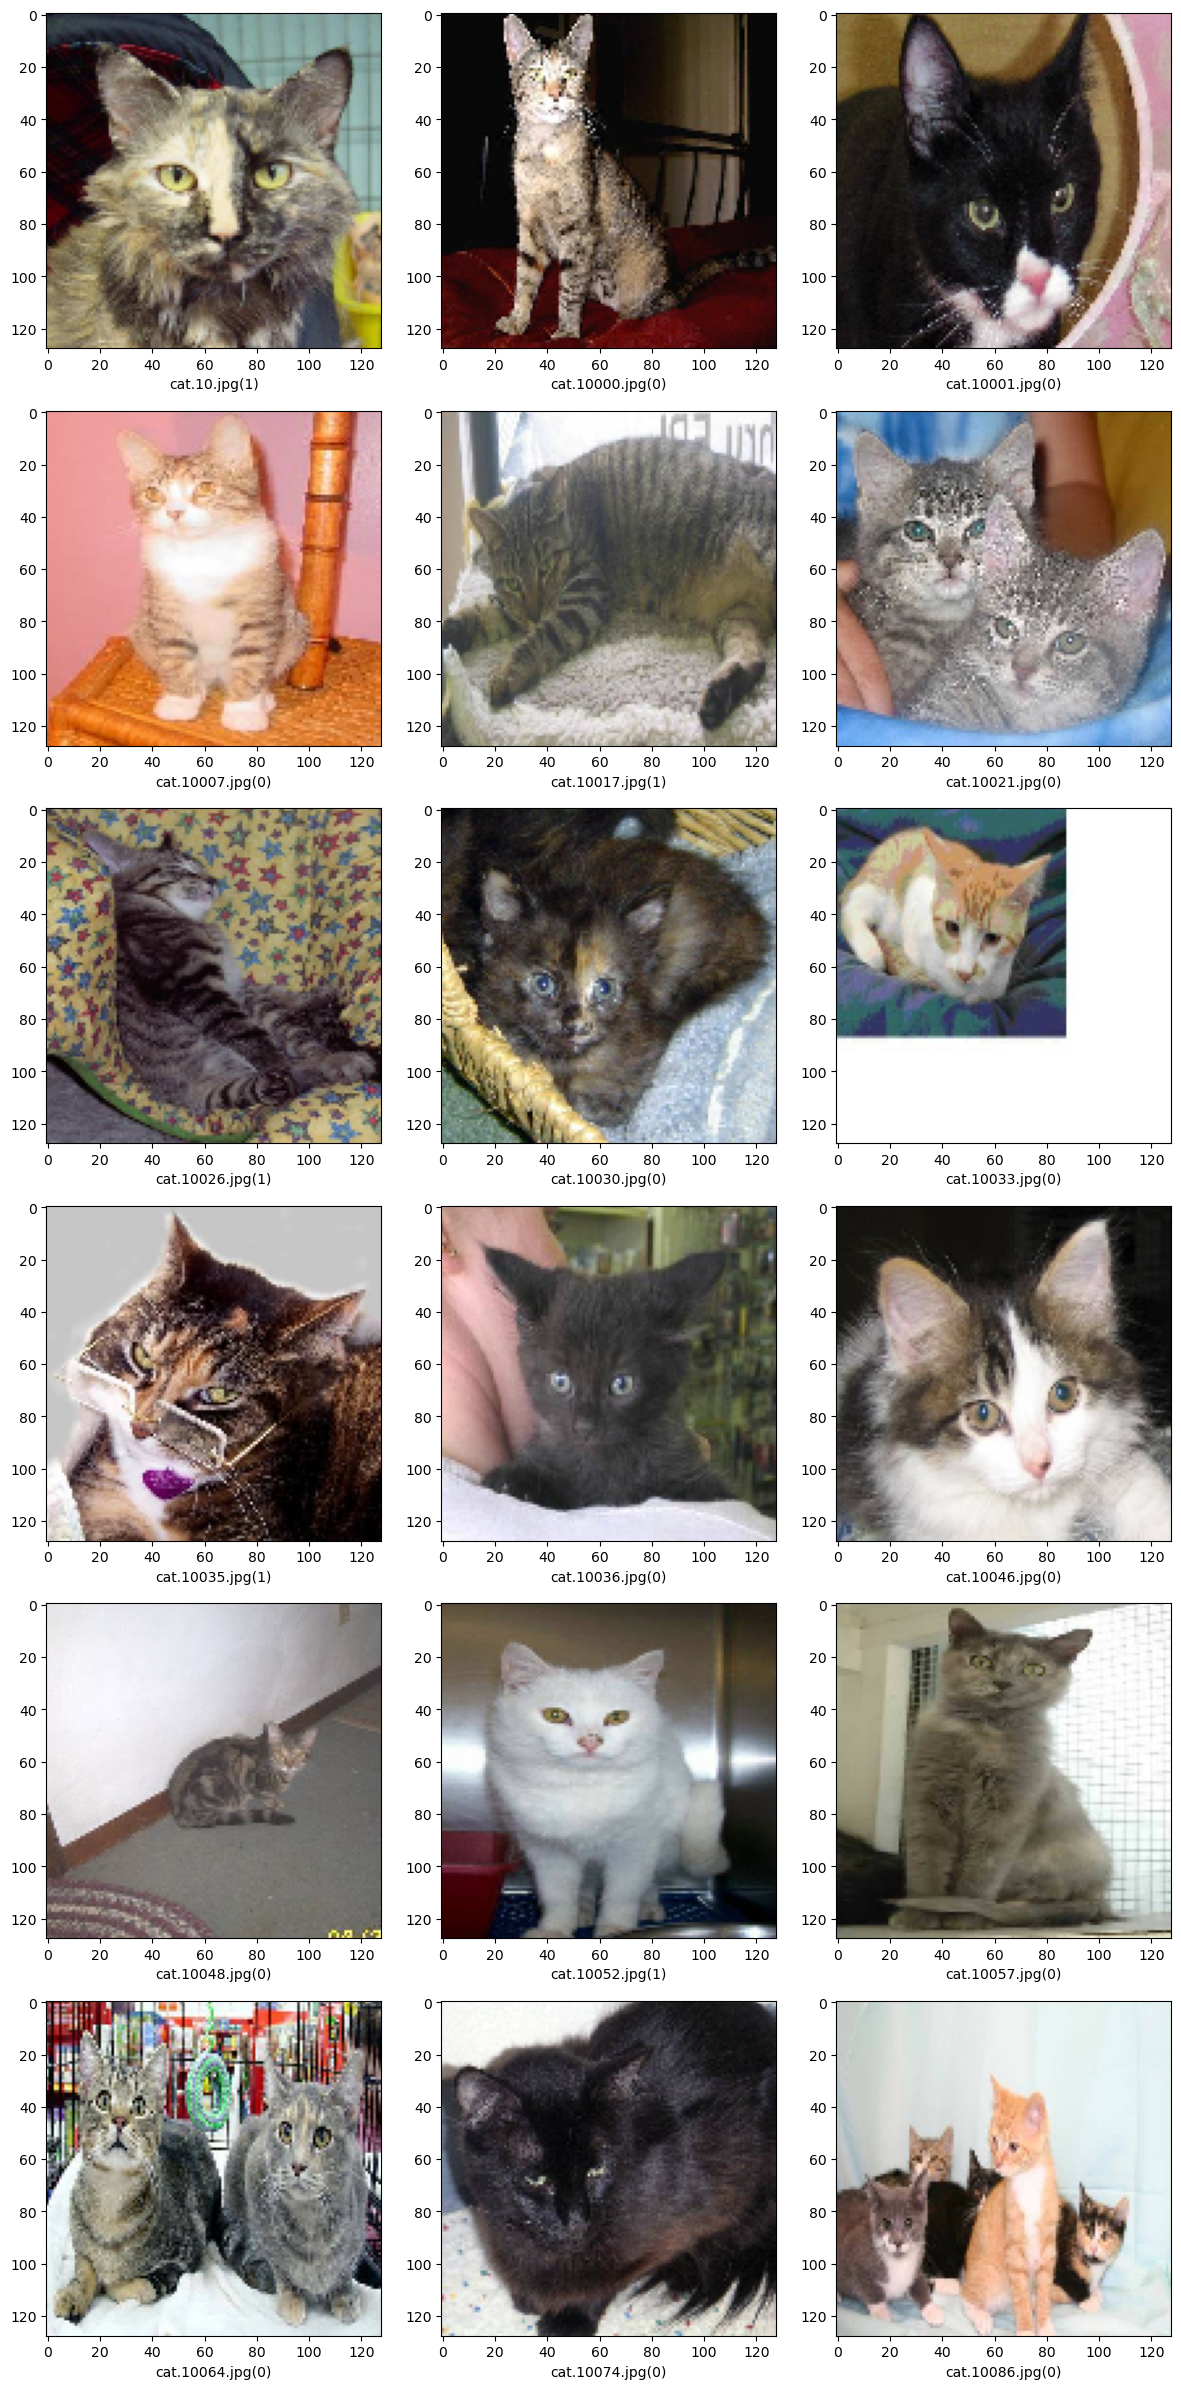

In [38]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("C:/Users/asus/Downloads/dogs_vs_cats/test/"+filename, target_size=Image_Size)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

15. Test your model performance on custom data:

#### Exportation of model & dataset¶

In [ ]:
import pickle

In [ ]:
pickle_cnn_model=pickle.dumps(model)

In [ ]:
print(type(pickle_cnn_model)) 

In [2]:
# with open('pickle_cnn_model.pkl', 'rb') as file:
#     loaded_model = pickle.load(file)

# print(loaded_model)  


Importing the libray to load the saved model 

In [1]:
from tensorflow.keras.models import load_model

###### Unsaved using load_model model 

In [2]:
model = load_model("model1_catsVSdogs_10epoch.h5")

# Prediction on custom input

In [9]:
from PIL import Image
import numpy as np

# Define the class labels
results = {
    0: 'cat',
    1: 'dog'
}

# Load and preprocess the image
Image_Size = (128, 128)  # Replace with the input size expected by your model
im = Image.open("C:\Users\asus\Downloads/custom_data/ANIMAL.jpg")
im = im.resize(Image_Size)
im = np.array(im) / 255.0  # Normalize the image to [0, 1]
im = np.expand_dims(im, axis=0)  # Add a batch dimension

# Make a prediction
pred = model.predict(im)[0]  # Get the probabilities for each class

# Find the class with the highest probability
predicted_class = np.argmax(pred)

# Print the predicted class and its corresponding label
print(f"Predicted class index: {predicted_class}, Label: {results[predicted_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Predicted class index: 0, Label: cat
